# Notebook 30: Which fault is more likely?

Mohr Coulomb and frictional envelopes are also useful to assess the likelihood of faulting. Let's solve the following problem using the functions in the module [failure_envelope](../functions/failure_envelope.py).

## Problem

Two old reverse faults, one dipping 25° and the other 50°, are present in a region currently undergoing normal faulting. The density of the crust in this region is 2450 kg/m3. The coefficient of static friction μs = 0.60 and the cohesion c = 20 MPa.

1. Assuming that $\sigma_1$ was horizontal when the 25° thrust fault formed, what is the internal friction angle, $\phi_i$, of the rocks in which these faults are located?

In [ ]:
import numpy as np

# fault dips in radians
dip_t = np.radians(25)
dip_n = np.radians(50)

# in a thrust regime, sigma_1 is horizontal
# and beta, the angle the fault makes with
# sigma_1, is equal to the fault dip
beta = dip_t 
phi_i = np.pi/2 - 2*beta
print(f"phi_i = {np.degrees(phi_i)}°")

phi_i = 40.0°


2. At 4 km depth in the crust and during the subsequent phase of normal faulting,
determine which of the following will happen: i. A new fault will form. If so what will
the dip of this new fault be? ii. The 25° dipping thrust will be reactivated as a normal
fault. iii. The 50° dipping thrust will be reactivated as a normal fault. Plot Mohr Circles for stress and the appropriate failure envelope for all three cases (just use
the upper part of the circle).

Differential stress for new fault: 93.81 MPa
Differential stress for thrust fault: 117.56 MPa
Differential stress for normal fault: 68.23 MPa


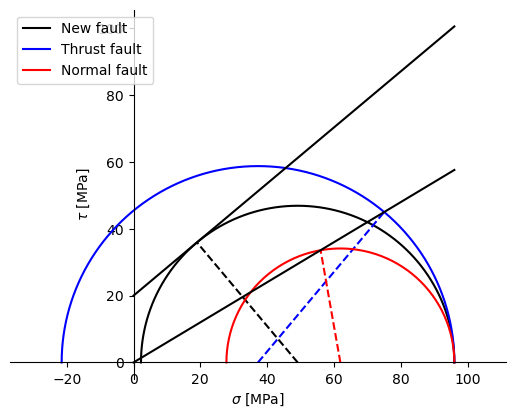

In [ ]:
import matplotlib.pyplot as plt

# this makes visible our functions folder
import sys, os
sys.path.append(os.path.abspath("../functions"))

# import functions 
from failure_envelope import sigma_3_optimal, sigma_3_for_beta
# import class
from Circle import Circle

# in a normal faulting regime, 
# sigma_1 is vertical and fault dip
# is equal to theta, the angle the 
# normal to the fault makes with sigma_1

# sigma_1 is lithostatic pressure
sigma_1 = (2450 * 9.8 * 4e3)/1e6 # MPa

# optimal sigma_3 for a new fault
c = 20 # cohesion in MPa
sigma_3 = sigma_3_optimal(sigma_1, phi_i, c)

# sigma_3 for slip on thrust
phi_s = np.arctan(0.6) 
beta = (np.pi/2-dip_t) 
sigma_3_t = sigma_3_for_beta(sigma_1, beta, phi_s)

# sigma_3 for slip on normal fault
beta = (np.pi/2-dip_n) 
sigma_3_n = sigma_3_for_beta(sigma_1, beta, phi_s)

# output differential stress
print(f"Differential stress for new fault: {sigma_1-sigma_3:.2f} MPa")
print(f"Differential stress for thrust fault: {sigma_1-sigma_3_t:.2f} MPa")
print(f"Differential stress for normal fault: {sigma_1-sigma_3_n:.2f} MPa")  

# Mohr circles
# new fault
center = (sigma_1 + sigma_3)/2
radius = (sigma_1 - sigma_3)/2
circle = Circle([center, 0], radius)
x, y = circle.coordinates(0, np.pi)
theta = np.pi/4 + phi_i/2 # dip of new fault in degrees
xp, yp = circle.coordinates_at_angle(2*theta)
line = [[center, xp], [0, yp]]

# thrust fault
center = (sigma_1 + sigma_3_t)/2
radius = (sigma_1 - sigma_3_t)/2
circle = Circle([center, 0], radius)
x_t, y_t = circle.coordinates(0, np.pi)
xp_t, yp_t = circle.coordinates_at_angle(2*dip_t)
line_t = [[center, xp_t], [0, yp_t]]

# normal fault
center = (sigma_1 + sigma_3_n)/2
radius = (sigma_1 - sigma_3_n)/2
circle = Circle([center, 0], radius)
x_n, y_n = circle.coordinates(0, np.pi)
xp_n, yp_n = circle.coordinates_at_angle(2*dip_n)
line_n = [[center, xp_n], [0, yp_n]]

# failure envelopes
x_e = np.array([0, sigma_1])
y_cme = np.tan(phi_i)*x_e + c # Coulomb-Mohr envelope
y_fe = np.tan(phi_s)*x_e # friction envelope

# plot
fig, ax = plt.subplots()
ax.plot(x, y, "k-", label="New fault")
ax.plot(line[0], line[1], "k--")
ax.plot(x_t, y_t, "b-", label="Thrust fault")
ax.plot(line_t[0], line_t[1], "b--")
ax.plot(x_n, y_n, "r-", label="Normal fault")
ax.plot(line_n[0], line_n[1], "r--")
ax.plot(x_e, y_cme, "k-")
ax.plot(x_e, y_fe, "k-")
ax.legend()
# axes labels
ax.set_xlabel(r"$\sigma$ [MPa]")
ax.set_ylabel(r"$\tau$ [MPa]")
# axes equal
ax.axis("equal")
# move axes to zero
ax.spines["bottom"].set_position("zero")
ax.spines["left"].set_position("zero")
# remove right and top spines
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()

The 50° fault will be reactivated as a normal fault, because this is the scenario for which the least differential stress ($\sigma_1 − \sigma_3$) is needed.